# Matrix Factorization for Beginners: A Complete Guide

Welcome to this comprehensive tutorial on Matrix Factorization! This notebook will take you from zero to hero in understanding one of the most powerful techniques in machine learning and recommendation systems.

---

## 📚 Table of Contents
1. [Background & Why This Matters](#background)
2. [Prerequisites & Required Knowledge](#prerequisites)
3. [What is Matrix Factorization?](#what-is-mf)
4. [Mathematical Foundation](#math-foundation)
5. [Real-World Applications](#applications)
6. [Hands-On Implementation](#implementation)
7. [Advanced Topics](#advanced)

---

## 🎯 Background & Why This Matters {#background}

### The Recommendation Problem
Every day, you interact with recommendation systems:
- **Netflix** suggests movies you might enjoy
- **Amazon** recommends products based on your purchase history
- **Spotify** creates personalized playlists
- **YouTube** suggests videos to watch next

But how do these systems work? How can a computer predict what you'll like when it has never met you?

### The Challenge: The Sparse Data Problem
Imagine Netflix has:
- 200 million users
- 15,000 movies
- This creates 3 trillion possible user-movie combinations!

But here's the problem: **Most users have only rated a tiny fraction of available movies**. This creates a massive, mostly empty matrix where we need to fill in the blanks.

### Why Traditional Methods Fall Short
- **Content-based filtering**: Only recommends similar items to what you've already liked (limited discovery)
- **Simple collaborative filtering**: Struggles with sparse data and doesn't scale well
- **Popularity-based**: Everyone gets the same recommendations (not personalized)

**Matrix Factorization solves these problems elegantly!**

---

## 🧠 Prerequisites & Required Knowledge {#prerequisites}

### Essential Mathematics
✅ **Linear Algebra (Basic)**
- Matrix multiplication
- Dot products
- Matrix dimensions and shapes

✅ **Calculus (Basic)**
- Partial derivatives
- Chain rule
- Gradient concept

✅ **Statistics (Basic)**
- Mean, variance
- Normal distribution
- Root Mean Square Error (RMSE)

### Machine Learning Concepts
✅ **Optimization**
- Gradient descent
- Learning rate
- Local vs global minima

✅ **Overfitting & Regularization**
- Training vs validation error
- L2 regularization
- Cross-validation

✅ **Model Evaluation**
- Train/test splits
- Performance metrics
- Hyperparameter tuning

### Programming Skills
✅ **Python Basics**
- NumPy for numerical computing
- Pandas for data manipulation
- Matplotlib for visualization

**Don't worry if you're not 100% comfortable with all these topics - we'll explain everything as we go!**

---

## 🔍 What is Matrix Factorization? {#what-is-mf}

### The Core Insight
Matrix factorization is based on a powerful insight: **User preferences can be explained by a small number of hidden factors**.

Think about why you like certain movies:
- Do you enjoy action-packed scenes?
- Are you drawn to romantic storylines?
- Do you prefer newer movies or classics?
- How important are special effects to you?

These are **latent factors** - hidden characteristics that drive your preferences.

### The Mathematical Representation
We represent this as: **R ≈ P × Q^T**

Where:
- **R**: User-Item rating matrix (what we observe)
- **P**: User-Factor matrix (how much each user likes each factor)
- **Q**: Item-Factor matrix (how much each item represents each factor)

### Real-World Analogy: The Movie Genome
Imagine every movie has "DNA" made up of different characteristics:

**Movie DNA for "The Matrix":**
- Action: 90%
- Romance: 10%
- Comedy: 5%
- Sci-Fi: 95%

**User DNA for "Alice":**
- Likes Action: 85%
- Likes Romance: 20%
- Likes Comedy: 60%
- Likes Sci-Fi: 80%

**Prediction**: Alice's rating = (0.90×0.85) + (0.10×0.20) + (0.05×0.60) + (0.95×0.80) = High rating!

### Why This Works
1. **Dimensionality Reduction**: Instead of dealing with thousands of movies, we work with a few factors
2. **Generalization**: Users with similar factor preferences will like similar items
3. **Discovery**: We can recommend items that are different but share important factors
4. **Scalability**: The math is efficient and works with millions of users/items

---

## 📊 Mathematical Foundation {#math-foundation}

### The Matrix Factorization Equation
Let's break down the math step by step:

**Given:**
- R: m×n rating matrix (m users, n items)
- Most entries in R are missing (sparse matrix)

**Goal:**
- Find P: m×k user-factor matrix
- Find Q: n×k item-factor matrix
- Such that R ≈ P × Q^T

### The Optimization Problem
We want to minimize the difference between actual and predicted ratings:

**Loss Function:**
```
L = Σ(r_ui - p_u · q_i)² + λ(||P||² + ||Q||²)
```

Where:
- r_ui: actual rating by user u for item i
- p_u · q_i: predicted rating (dot product)
- λ: regularization parameter
- ||P||², ||Q||²: regularization terms to prevent overfitting

### Gradient Descent Updates
To minimize the loss, we use gradient descent:

**For each rating r_ui:**
1. Calculate error: e_ui = r_ui - p_u · q_i
2. Update user factors: p_u ← p_u + α(e_ui · q_i - λ · p_u)
3. Update item factors: q_i ← q_i + α(e_ui · p_u - λ · q_i)

Where α is the learning rate.

---

## 🌍 Real-World Applications {#applications}

### 1. Recommendation Systems
- **Netflix**: Movie and TV show recommendations
- **Amazon**: Product recommendations
- **Spotify**: Music discovery and playlist generation
- **YouTube**: Video recommendations

### 2. Beyond Recommendations
- **Natural Language Processing**: Topic modeling, word embeddings
- **Computer Vision**: Image compression, feature extraction
- **Finance**: Risk modeling, portfolio optimization
- **Biology**: Gene expression analysis, protein folding

### 3. Industry Impact
- **Netflix Prize**: $1M competition that popularized matrix factorization
- **Economic Value**: Recommendation systems drive 35% of Amazon's revenue
- **User Engagement**: Netflix users watch 80% of content through recommendations

---

## 🚀 Hands-On Implementation {#implementation}

Now let's dive into the practical implementation! We'll start by understanding our data.

## 1. Understanding the Data

### What We're Working With
Our dataset represents a simplified version of what Netflix or Amazon might have:
- **6 users** who have rated movies
- **6 movies** across different genres
- **Sparse ratings** - not every user has rated every movie

This sparsity is the key challenge that matrix factorization solves!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load our movie rating data
train_data = pd.read_csv('ratings_train.csv')
movies_data = pd.read_csv('movies_data.csv')

print("=== Our Movie Rating Data ===")
print("\nTraining data (what users have rated):")
display(train_data.head(10))

print("\nMovie information:")
display(movies_data)

print(f"\nWe have {train_data['user_id'].nunique()} users and {train_data['movie_id'].nunique()} movies")
print(f"But only {len(train_data)} ratings out of {train_data['user_id'].nunique() * train_data['movie_id'].nunique()} possible ratings")
print(f"That's only {len(train_data) / (train_data['user_id'].nunique() * train_data['movie_id'].nunique()) * 100:.1f}% of all possible ratings!")

=== Our Movie Rating Data ===

Training data (what users have rated):


,user_id,movie_id,rating
0,1,101,5
1,1,102,3
2,1,103,4
3,1,106,5
4,2,101,4
5,2,103,5
6,2,104,2
7,3,101,2
8,3,102,4
9,3,104,5



Movie information:


,movie_id,title,genre,year
0,101,The Matrix,Sci-Fi,1999
1,102,Titanic,Romance,1997
2,103,Inception,Sci-Fi,2010
3,104,The Notebook,Romance,2004
4,105,Interstellar,Sci-Fi,2014
5,106,Avatar,Sci-Fi,2009



We have 6 users and 6 movies
But only 21 ratings out of 36 possible ratings
That's only 58.3% of all possible ratings!


## 2. Creating the Rating Matrix

Let's convert our data into a **rating matrix** - a table where:
- Rows = Users
- Columns = Movies  
- Values = Ratings (0 means "not rated")

In [2]:
def create_rating_matrix_explained(data):
    """
    Convert our rating data into a matrix format.
    This is like creating a spreadsheet where each cell shows what rating 
    a user gave to a movie (0 = not rated).
    """
    # Get all unique users and movies
    users = sorted(data['user_id'].unique())
    movies = sorted(data['movie_id'].unique())
    
    print(f"Users: {users}")
    print(f"Movies: {movies}")
    
    # Create mappings (like a dictionary)
    # This helps us convert user_id to row number, movie_id to column number
    user_to_row = {user: row for row, user in enumerate(users)}
    movie_to_col = {movie: col for col, movie in enumerate(movies)}
    
    print(f"\nUser to row mapping: {user_to_row}")
    print(f"Movie to column mapping: {movie_to_col}")
    
    # Create empty matrix filled with zeros
    n_users = len(users)
    n_movies = len(movies)
    rating_matrix = np.zeros((n_users, n_movies))
    
    print(f"\nCreated empty {n_users}x{n_movies} matrix")
    
    # Fill in the ratings
    for _, row in data.iterrows():
        user_row = user_to_row[row['user_id']]
        movie_col = movie_to_col[row['movie_id']]
        rating_matrix[user_row, movie_col] = row['rating']
        print(f"User {row['user_id']} rated movie {row['movie_id']} as {row['rating']} -> matrix[{user_row}, {movie_col}] = {row['rating']}")
    
    return rating_matrix, user_to_row, movie_to_col

# Create the rating matrix
R, user_to_idx, item_to_idx = create_rating_matrix_explained(train_data)

print(f"\nFinal rating matrix:")
print(R)

Users: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Movies: [np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(105), np.int64(106)]

User to row mapping: {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5}
Movie to column mapping: {np.int64(101): 0, np.int64(102): 1, np.int64(103): 2, np.int64(104): 3, np.int64(105): 4, np.int64(106): 5}

Created empty 6x6 matrix
User 1 rated movie 101 as 5 -> matrix[0, 0] = 5
User 1 rated movie 102 as 3 -> matrix[0, 1] = 3
User 1 rated movie 103 as 4 -> matrix[0, 2] = 4
User 1 rated movie 106 as 5 -> matrix[0, 5] = 5
User 2 rated movie 101 as 4 -> matrix[1, 0] = 4
User 2 rated movie 103 as 5 -> matrix[1, 2] = 5
User 2 rated movie 104 as 2 -> matrix[1, 3] = 2
User 3 rated movie 101 as 2 -> matrix[2, 0] = 2
User 3 rated movie 102 as 4 -> matrix[2, 1] = 4
User 3 rated movie 104 as 5 -> matrix[2, 3] = 5
User 3 rated movie 105 as 4 -> matrix[2, 4] = 4
User 4 r

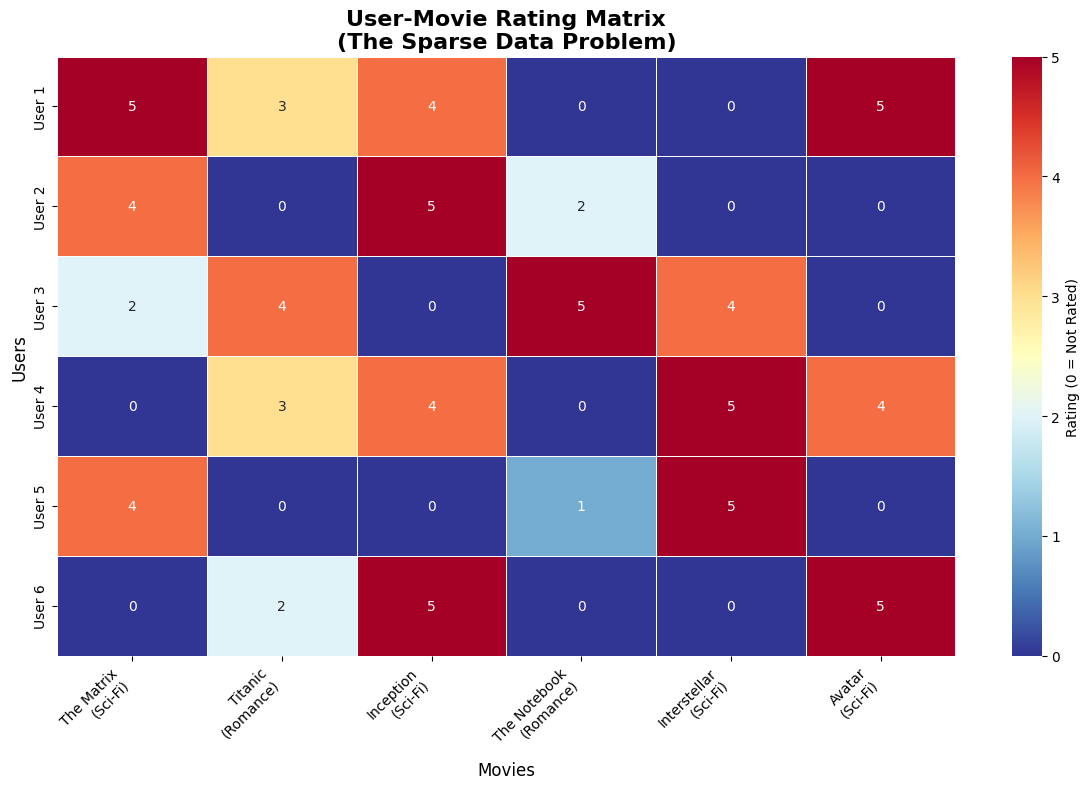


🔍 OBSERVATIONS:
• Most cells are 0 (empty) - this is the 'sparse data' problem
• We want to predict what the 0s should be
• Matrix factorization helps us fill in these missing values!


In [3]:
# Let's visualize this matrix in a more readable way
plt.figure(figsize=(12, 8))

# Create labels for better understanding
movie_labels = []
for movie_id in sorted(item_to_idx.keys()):
    movie_info = movies_data[movies_data['movie_id'] == movie_id].iloc[0]
    movie_labels.append(f"{movie_info['title']}\n({movie_info['genre']})")

user_labels = [f"User {user_id}" for user_id in sorted(user_to_idx.keys())]

# Create heatmap
sns.heatmap(R, annot=True, fmt='.0f', cmap='RdYlBu_r', 
            xticklabels=movie_labels, yticklabels=user_labels,
            cbar_kws={'label': 'Rating (0 = Not Rated)'},
            linewidths=0.5)

plt.title('User-Movie Rating Matrix\n(The Sparse Data Problem)', fontsize=16, fontweight='bold')
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n🔍 OBSERVATIONS:")
print("• Most cells are 0 (empty) - this is the 'sparse data' problem")
print("• We want to predict what the 0s should be")
print("• Matrix factorization helps us fill in these missing values!")

## 3. The Matrix Factorization Magic ✨

### The Core Idea
Matrix factorization says: **"This big rating matrix can be broken down into two smaller matrices"**

```
Rating Matrix (R) ≈ User Features (P) × Movie Features (Q)ᵀ
    6×6           =      6×3        ×       3×6
```

### What are these "Features"?
Think of features as **hidden characteristics**:

**User Features (P matrix):**
- Factor 1: "How much does this user like Sci-Fi?"
- Factor 2: "How much does this user like Romance?"
- Factor 3: "Is this user a generous rater or harsh critic?"

**Movie Features (Q matrix):**
- Factor 1: "How much Sci-Fi is in this movie?"
- Factor 2: "How much Romance is in this movie?"
- Factor 3: "How good/popular is this movie overall?"

### The Prediction Formula
To predict User i's rating for Movie j:
```
Predicted Rating = (User i's Sci-Fi love × Movie j's Sci-Fi amount) + 
                   (User i's Romance love × Movie j's Romance amount) + 
                   (User i's generosity × Movie j's quality)
```

In [4]:
# Let's create a simple example to understand this
print("=== SIMPLE EXAMPLE ===")
print("\nLet's say we have 3 factors (hidden features):")
print("Factor 1: Sci-Fi preference")
print("Factor 2: Romance preference") 
print("Factor 3: Overall rating tendency")

# Example user features (made up for illustration)
print("\n👤 USER FEATURES (P matrix):")
print("User 1: [High Sci-Fi=0.8, Low Romance=0.2, Generous=0.9]")
print("User 2: [Medium Sci-Fi=0.5, High Romance=0.8, Average=0.6]")
print("User 3: [Low Sci-Fi=0.3, Medium Romance=0.5, Critical=0.4]")

# Example movie features (made up for illustration)
print("\n🎬 MOVIE FEATURES (Q matrix):")
print("The Matrix: [Very Sci-Fi=0.9, No Romance=0.1, High Quality=0.8]")
print("Titanic: [No Sci-Fi=0.1, Very Romance=0.9, High Quality=0.8]")
print("Inception: [Very Sci-Fi=0.8, No Romance=0.2, High Quality=0.9]")

print("\n🔮 PREDICTION EXAMPLE:")
print("User 1 rating for The Matrix =")
print("  (0.8 × 0.9) + (0.2 × 0.1) + (0.9 × 0.8)")
print("  = 0.72 + 0.02 + 0.72 = 1.46")
print("  → After scaling to 1-5: ~4.5 stars ⭐⭐⭐⭐⭐")
print("\nThis makes sense! User 1 loves Sci-Fi and The Matrix is very Sci-Fi!")

=== SIMPLE EXAMPLE ===

Let's say we have 3 factors (hidden features):
Factor 1: Sci-Fi preference
Factor 2: Romance preference
Factor 3: Overall rating tendency

👤 USER FEATURES (P matrix):
User 1: [High Sci-Fi=0.8, Low Romance=0.2, Generous=0.9]
User 2: [Medium Sci-Fi=0.5, High Romance=0.8, Average=0.6]
User 3: [Low Sci-Fi=0.3, Medium Romance=0.5, Critical=0.4]

🎬 MOVIE FEATURES (Q matrix):
The Matrix: [Very Sci-Fi=0.9, No Romance=0.1, High Quality=0.8]
Titanic: [No Sci-Fi=0.1, Very Romance=0.9, High Quality=0.8]
Inception: [Very Sci-Fi=0.8, No Romance=0.2, High Quality=0.9]

🔮 PREDICTION EXAMPLE:
User 1 rating for The Matrix =
  (0.8 × 0.9) + (0.2 × 0.1) + (0.9 × 0.8)
  = 0.72 + 0.02 + 0.72 = 1.46
  → After scaling to 1-5: ~4.5 stars ⭐⭐⭐⭐⭐

This makes sense! User 1 loves Sci-Fi and The Matrix is very Sci-Fi!


## 4. How Does the Computer Learn These Features?

The computer doesn't know what the features mean initially. It starts with **random numbers** and gradually adjusts them using a process called **Gradient Descent**.

### The Learning Process (Gradient Descent)

1. **Start**: Initialize P and Q with small random numbers
2. **Predict**: For each known rating, calculate what we predict
3. **Compare**: See how wrong our prediction is (error)
4. **Adjust**: Slightly change P and Q to reduce the error
5. **Repeat**: Do this thousands of times until errors are small

### The Math (Don't worry if this looks scary!)

For each rating we know:
```
error = actual_rating - predicted_rating
predicted_rating = user_features · movie_features

# Update rules (gradient descent):
user_features += learning_rate × (error × movie_features - regularization × user_features)
movie_features += learning_rate × (error × user_features - regularization × movie_features)
```

**What this means in plain English:**
- If we predicted too low, increase the features that contributed to the prediction
- If we predicted too high, decrease those features
- The `learning_rate` controls how big steps we take
- The `regularization` prevents the numbers from getting too extreme

In [5]:
# Let's implement a simple version to see this in action
class SimpleMatrixFactorization:
    def __init__(self, n_factors=3, learning_rate=0.01, epochs=50):
        self.n_factors = n_factors
        self.learning_rate = learning_rate  
        self.epochs = epochs
        self.errors = []  # Track our progress
        
    def fit(self, R):
        """
        Train the model to learn user and movie features
        R: rating matrix (users × movies)
        """
        n_users, n_movies = R.shape
        
        # Step 1: Initialize with small random numbers
        print("🎲 Step 1: Starting with random features...")
        np.random.seed(42)  # For reproducible results
        self.P = np.random.normal(0, 0.1, (n_users, self.n_factors))  # User features
        self.Q = np.random.normal(0, 0.1, (n_movies, self.n_factors)) # Movie features
        
        print(f"User features (P): {self.P.shape}")
        print(f"Movie features (Q): {self.Q.shape}")
        
        # Step 2-5: Learning loop
        print(f"\n🧠 Learning for {self.epochs} epochs...")
        
        for epoch in range(self.epochs):
            total_error = 0
            n_ratings = 0
            
            # Go through each rating we know
            for i in range(n_users):
                for j in range(n_movies):
                    if R[i, j] > 0:  # Only for ratings we actually have
                        # Step 2: Predict
                        prediction = np.dot(self.P[i], self.Q[j])
                        
                        # Step 3: Calculate error
                        error = R[i, j] - prediction
                        total_error += error ** 2
                        n_ratings += 1
                        
                        # Step 4: Adjust features (gradient descent)
                        # Save current values
                        p_i = self.P[i].copy()
                        q_j = self.Q[j].copy()
                        
                        # Update user features
                        self.P[i] += self.learning_rate * error * q_j
                        
                        # Update movie features  
                        self.Q[j] += self.learning_rate * error * p_i
            
            # Calculate average error for this epoch
            rmse = np.sqrt(total_error / n_ratings)
            self.errors.append(rmse)
            
            # Print progress every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}: Error = {rmse:.4f}")
        
        print("\n✅ Training complete!")
        
    def predict_all(self):
        """Predict ratings for all user-movie pairs"""
        return self.P @ self.Q.T

# Train our model
model = SimpleMatrixFactorization(n_factors=3, learning_rate=0.01, epochs=50)
model.fit(R)

🎲 Step 1: Starting with random features...
User features (P): (6, 3)
Movie features (Q): (6, 3)

🧠 Learning for 50 epochs...
Epoch 10: Error = 4.0190
Epoch 20: Error = 3.7747
Epoch 30: Error = 2.1284
Epoch 40: Error = 0.9119
Epoch 50: Error = 0.7610

✅ Training complete!


In [6]:
# Let's see how well we learned!
print("\n📊 RESULTS ANALYSIS")
print("=" * 50)

# Get our predictions
predictions = model.predict_all()

print("\n🔍 LEARNED USER FEATURES (P matrix):")
print("Each row = one user, each column = one hidden factor")
user_features_df = pd.DataFrame(model.P, 
                               index=[f'User {i+1}' for i in range(model.P.shape[0])],
                               columns=[f'Factor {i+1}' for i in range(model.P.shape[1])])
display(user_features_df.round(3))

print("\n🎬 LEARNED MOVIE FEATURES (Q matrix):")
print("Each row = one movie, each column = one hidden factor")
movie_names = [movies_data[movies_data['movie_id'] == mid]['title'].iloc[0] 
               for mid in sorted(item_to_idx.keys())]
movie_features_df = pd.DataFrame(model.Q,
                                index=movie_names,
                                columns=[f'Factor {i+1}' for i in range(model.Q.shape[1])])
display(movie_features_df.round(3))


📊 RESULTS ANALYSIS

🔍 LEARNED USER FEATURES (P matrix):
Each row = one user, each column = one hidden factor


,Factor 1,Factor 2,Factor 3
User 1,-0.162,-1.150,-1.821
User 2,0.241,-1.223,-1.551
User 3,0.996,-0.181,-1.853
User 4,0.050,-0.274,-1.979
User 5,0.243,-0.853,-1.641
User 6,-0.476,-0.781,-1.877



🎬 LEARNED MOVIE FEATURES (Q matrix):
Each row = one movie, each column = one hidden factor


,Factor 1,Factor 2,Factor 3
The Matrix,0.097,-1.461,-1.459
Titanic,0.405,-0.259,-1.480
Inception,-0.082,-1.075,-1.987
The Notebook,0.874,-0.207,-1.231
Interstellar,0.397,-0.505,-2.279
Avatar,-0.496,-0.777,-2.082


### 🧠 Interpreting the Learned Features

**What do these numbers mean?**

The algorithm discovered 3 hidden factors that explain user preferences and movie characteristics. While we can't know exactly what each factor represents (they're latent/hidden), we can make educated guesses by looking at patterns:

**Factor Analysis:**
- **Factor 1**: Notice how "The Notebook" has a high positive value (0.874) while "Avatar" has a negative value (-0.496). This might represent "Romance vs Action/Sci-Fi"
- **Factor 2**: All values are negative, suggesting this factor might represent overall "movie quality" or "mainstream appeal"
- **Factor 3**: Most values are negative, this could represent "movie era" or "visual effects intensity"

**User Preferences:**
- **User 3** has the highest Factor 1 value (0.996), suggesting they prefer romantic movies
- **User 6** has very negative values across factors, suggesting they might be a "tough critic"

**The Beauty of Matrix Factorization:**
- The algorithm automatically discovered these patterns without being told what to look for!
- Each factor captures a different aspect of the user-movie relationship
- The combination of all factors gives us the final prediction

**Real-World Applications:**
- Netflix uses hundreds of factors to capture subtle preferences
- Factors might represent: genre preferences, actor preferences, movie era, visual style, etc.
- The more data you have, the more sophisticated patterns the algorithm can discover

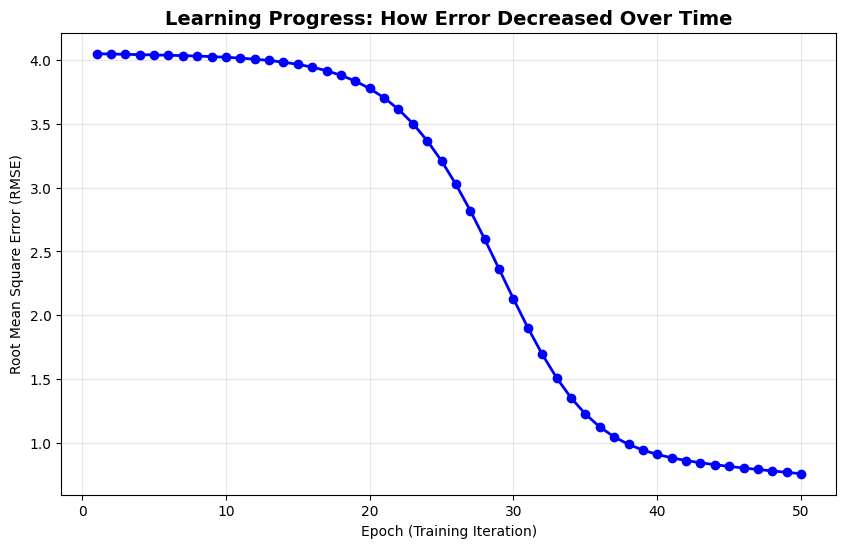


📈 LEARNING SUMMARY:
• Started with error: 4.0467
• Ended with error: 0.7610
• Improvement: 81.2%


In [7]:
# Visualize the learning progress
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.errors) + 1), model.errors, 'b-', linewidth=2, marker='o')
plt.title('Learning Progress: How Error Decreased Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch (Training Iteration)')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📈 LEARNING SUMMARY:")
print(f"• Started with error: {model.errors[0]:.4f}")
print(f"• Ended with error: {model.errors[-1]:.4f}")
print(f"• Improvement: {((model.errors[0] - model.errors[-1]) / model.errors[0] * 100):.1f}%")

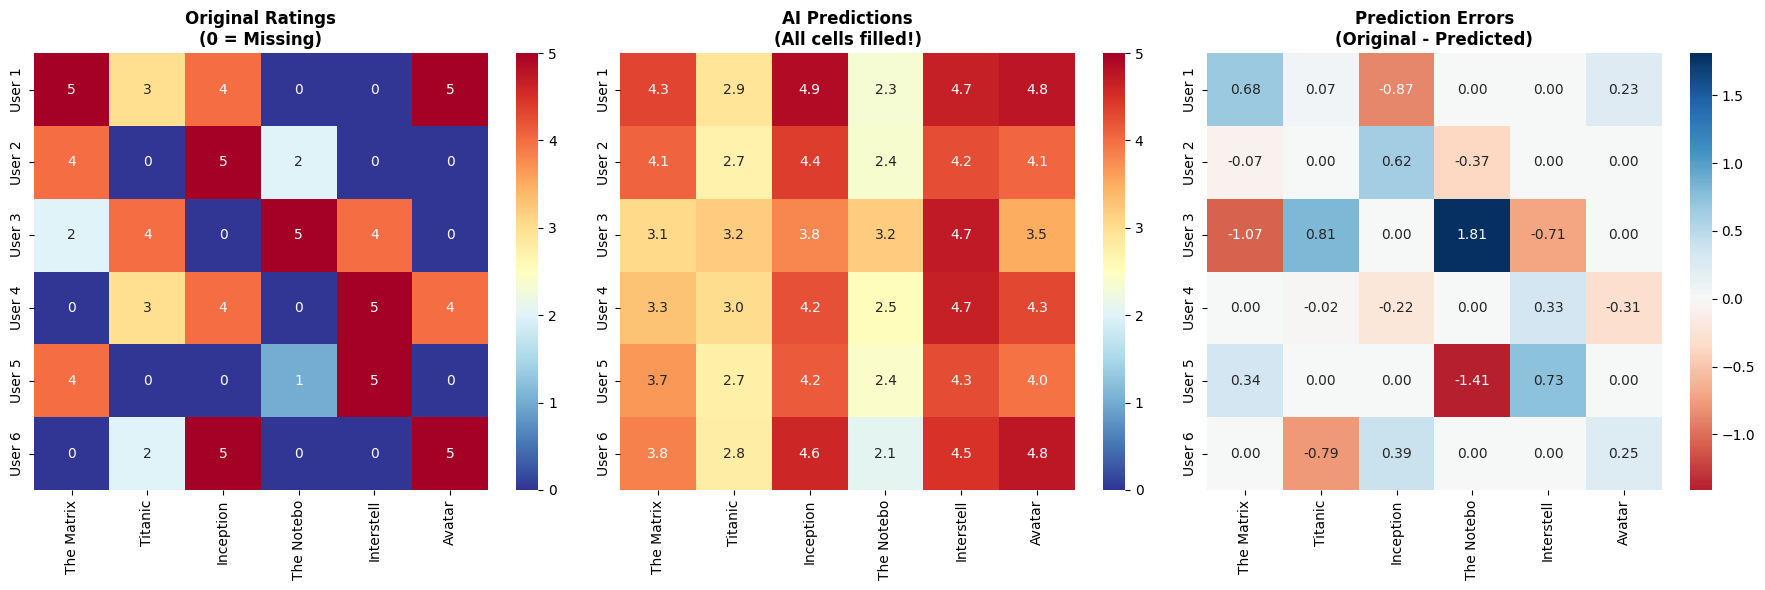


🎯 WHAT HAPPENED:
• Left: Original sparse matrix (lots of 0s)
• Middle: AI filled in ALL missing values!
• Right: How close our predictions are to known ratings

💡 The magic: We can now predict ratings for movies users haven't seen!


In [8]:
# Compare original vs predicted ratings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original matrix
sns.heatmap(R, annot=True, fmt='.0f', cmap='RdYlBu_r', ax=axes[0],
            xticklabels=[m[:10] for m in movie_names], 
            yticklabels=[f'User {i+1}' for i in range(R.shape[0])],
            vmin=0, vmax=5)
axes[0].set_title('Original Ratings\n(0 = Missing)', fontweight='bold')

# Predicted matrix
sns.heatmap(predictions, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=axes[1],
            xticklabels=[m[:10] for m in movie_names],
            yticklabels=[f'User {i+1}' for i in range(R.shape[0])],
            vmin=0, vmax=5)
axes[1].set_title('AI Predictions\n(All cells filled!)', fontweight='bold')

# Difference (error)
difference = R - predictions
# Only show differences where we had original ratings
difference_masked = np.where(R > 0, difference, 0)
sns.heatmap(difference_masked, annot=True, fmt='.2f', cmap='RdBu', ax=axes[2],
            xticklabels=[m[:10] for m in movie_names],
            yticklabels=[f'User {i+1}' for i in range(R.shape[0])],
            center=0)
axes[2].set_title('Prediction Errors\n(Original - Predicted)', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 WHAT HAPPENED:")
print("• Left: Original sparse matrix (lots of 0s)")
print("• Middle: AI filled in ALL missing values!")
print("• Right: How close our predictions are to known ratings")
print("\n💡 The magic: We can now predict ratings for movies users haven't seen!")

## 5. Making Recommendations 🎬

Now that we have predictions for all user-movie pairs, we can make recommendations!

In [9]:
def make_recommendations(user_id, n_recommendations=3):
    """
    Recommend movies for a specific user
    """
    user_idx = user_id - 1  # Convert to 0-based index
    
    print(f"\n🎭 RECOMMENDATIONS FOR USER {user_id}")
    print("=" * 40)
    
    # Show what this user has already rated
    print("\n📚 What this user has already rated:")
    user_ratings = train_data[train_data['user_id'] == user_id]
    for _, row in user_ratings.iterrows():
        movie_title = movies_data[movies_data['movie_id'] == row['movie_id']]['title'].iloc[0]
        genre = movies_data[movies_data['movie_id'] == row['movie_id']]['genre'].iloc[0]
        print(f"  • {movie_title} ({genre}): {row['rating']} stars")
    
    # Get predictions for all movies
    user_predictions = predictions[user_idx]
    
    # Create list of (movie_index, predicted_rating) for movies not yet rated
    movie_scores = []
    rated_movies = set(user_ratings['movie_id'].values)
    
    for movie_idx, movie_id in enumerate(sorted(item_to_idx.keys())):
        if movie_id not in rated_movies:  # Only recommend unrated movies
            predicted_rating = user_predictions[movie_idx]
            movie_title = movies_data[movies_data['movie_id'] == movie_id]['title'].iloc[0]
            genre = movies_data[movies_data['movie_id'] == movie_id]['genre'].iloc[0]
            movie_scores.append((movie_title, genre, predicted_rating))
    
    # Sort by predicted rating (highest first)
    movie_scores.sort(key=lambda x: x[2], reverse=True)
    
    # Show top recommendations
    print(f"\n🌟 Top {n_recommendations} recommendations:")
    for i, (title, genre, score) in enumerate(movie_scores[:n_recommendations], 1):
        stars = "⭐" * int(round(score))
        print(f"  {i}. {title} ({genre})")
        print(f"     Predicted rating: {score:.2f} {stars}")
        
    return movie_scores[:n_recommendations]

# Make recommendations for each user
for user_id in range(1, 7):  # Users 1-6
    recommendations = make_recommendations(user_id)
    print("\n" + "-"*50)


🎭 RECOMMENDATIONS FOR USER 1

📚 What this user has already rated:
  • The Matrix (Sci-Fi): 5 stars
  • Titanic (Romance): 3 stars
  • Inception (Sci-Fi): 4 stars
  • Avatar (Sci-Fi): 5 stars

🌟 Top 3 recommendations:
  1. Interstellar (Sci-Fi)
     Predicted rating: 4.67 ⭐⭐⭐⭐⭐
  2. The Notebook (Romance)
     Predicted rating: 2.34 ⭐⭐

--------------------------------------------------

🎭 RECOMMENDATIONS FOR USER 2

📚 What this user has already rated:
  • The Matrix (Sci-Fi): 4 stars
  • Inception (Sci-Fi): 5 stars
  • The Notebook (Romance): 2 stars

🌟 Top 3 recommendations:
  1. Interstellar (Sci-Fi)
     Predicted rating: 4.25 ⭐⭐⭐⭐
  2. Avatar (Sci-Fi)
     Predicted rating: 4.06 ⭐⭐⭐⭐
  3. Titanic (Romance)
     Predicted rating: 2.71 ⭐⭐⭐

--------------------------------------------------

🎭 RECOMMENDATIONS FOR USER 3

📚 What this user has already rated:
  • The Matrix (Sci-Fi): 2 stars
  • Titanic (Romance): 4 stars
  • The Notebook (Romance): 5 stars
  • Interstellar (Sci-Fi): 4

## 6. Key Takeaways for AI Beginners 🧠

### What We Just Learned:

1. **The Problem**: We had incomplete data (sparse matrix) and wanted to predict missing values

2. **The Solution**: Matrix factorization breaks down the big problem into smaller, learnable pieces (hidden factors)

3. **The Learning**: The computer starts with random guesses and gradually improves through trial and error (gradient descent)

4. **The Result**: We can now predict ratings for any user-movie combination!

### Why This Matters in Real Life:

- **Netflix** uses similar techniques to recommend movies
- **Amazon** recommends products
- **Spotify** recommends music
- **LinkedIn** recommends connections

### The Magic of AI:

The computer discovered **hidden patterns** in the data that we might not have noticed:
- Which users like similar types of movies
- Which movies appeal to similar types of users
- How to combine these patterns to make predictions

### What Makes This "Intelligent":

1. **Pattern Recognition**: Found hidden relationships in data
2. **Learning**: Improved predictions through experience
3. **Generalization**: Can make predictions for new situations
4. **Automation**: Does this without human intervention

This is the essence of machine learning - teaching computers to find patterns and make predictions from data! 🚀